# Importando as bibliotecas...

In [1]:
import numpy as np
import math as mt
import sympy as sp
import inspect
import re 
import altair as alt
from vega_datasets import data
import pandas as pd
from numpy import cos, sin, exp
import sys
from __future__ import division 
import random
import time

# Capítulo 2 - Representação de números e aritmética de máquina


### Sistema de numeração e mudança de base

**Exemplo1 (sistema binário)**: o sistema de numeração em base dois é chamado de binário e os algarismos binários são conhecidos como bits. Um bit pode assumir dois valores distintos: 0 ou 1
Em Python podemos converter o número (1001,101)2 para a base decimal computando

In [2]:
print(1*2**3 + 0*2**2 + 0*2**1 + 1*2**0 + 1*2**-1 + 0*2**-2 + 1*2**-3)

9.625


**Exemplo2 (sistema quartenário)**: no sistema quaternário a base b é igual a
4 e, portanto, temos o seguinte conjunto de algarismos {0, 1, 2, 3}. Por exemplo:

In [3]:
#(301,2)4
print(3*4**2 + 0*4**1 + 1*4**0 + 2*4**(-1))

49.5


**Exemplo3 (sistema octal)**: no sistema octal a base é b = 8.

In [4]:
#(1357,24)8
print(1*8**3 + 3*8**2 + 5*8**1 + 7*8**0 + 2*8**(-1) + 2*8**(-2))

751.28125


**Exemplo4 (sistema hexadecimal)**: O sistema de numeração cuja a base é
b = 16 é chamado de sistema hexadecimal. Neste, temos o conjunto de algarismos
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, A, B, C, D, E, F }. Convertendo o número (E2AC) 16 para a base 10 temos:

In [5]:
print(14*16**3 + 2*16**2 + 10*16**1 + 12*16**0)

58028


**Obs2**: Python tem algumas sintaxes para representar números em
algumas bases.

In [6]:
print(0b1001)
print(0o157)
print(0xbeba)

9
111
48826


Dado um número decimal (X) 10 agora queremos
escrevê-lo em uma outra base b, isto é, queremos obter a seguinte representação:

* bX^(f) = d−1 + (d −2)/2 + (d-3)/b^2 + ...

**Exemplo5**: vamos converter o número 9,625 para a base binária (b = 2).
Primeiramente, decompomos 9,625 na soma de suas partes inteira e fracionária.

* 9,625 = 9 + 0,625.

In [7]:
x = 9 
d0 = x%2; x = int(x/2); print("d0 = %d, x = %d" % (d0,x))
d1 = x%2; x = int(x/2); print("d1 = %d, x = %d" % (d1,x))
d2 = x%2; x = int(x/2); print("d2 = %d, x = %d" % (d2,x))
d3 = x%2; x = int(x/2); print("d3 = %d, x = %d" % (d3,x))

d0 = 1, x = 4
d1 = 0, x = 2
d2 = 0, x = 1
d3 = 1, x = 0


**Obs3**: Python oferece algumas funções para a conversão de números
inteiros em base decimal para uma base dada.

In [8]:
print(bin(9))
print(oct(111))
print(hex(48826))

0b1001
0o157
0xbeba


### Notação científica e notação normalizada

**Obs4**:Em Python, podemos controlar a impressão de números usando
o comando print.



In [9]:
print("%1.5f" % -np.pi)
print("%1.5e" % -np.pi)

-3.14159
-3.14159e+00


### Arredondamento de números


**Arredondamento por truncamento (ou corte):** aproximamos x por 
* x̄ = ±d0,d1d2 ... dk × 10^e

simplesmente descartando os dígitos d j com j > k.

**Arredondamento por proximidade:** se dk+1 < 5 aproximamos x por 
* x̄ = ±d0,d1d2 ... dk × 10^e

senão aproximamos x por 
* x̄ = ±(d0 ,d1d2 ... dk + 10^(−k) ) × 10^e

### Precisão e épsilon de máquina


A **precisão p** de uma máquina é o número de dígitos significativos usados para representar um número. Note que p = |M|+1 em binário e p = |M| para outras bases. Note que p = |M|+1 em binário e p=|M| para outras bases.

O **Épsilon de máquina**, Emach = e, é definido de forma que 1 + e seja o menor número representável maior que 1, isto é, 1 + e é representável, mas não existem números representáveis em (1, 1+e).

**Obs6**: em Pyhton podemos obter o épsilon de máquina com os comandos:


In [10]:
sys.float_info.epsilon

2.220446049250313e-16

In [11]:
eps = sys.float_info.epsilon
1 + 1e-16 == 1

True

In [12]:
1 + eps == 1

False

**Obs7 (underflow)**: número muito pequeno geralmente é aproximado por zero

**Obs8 (overflow)**: número muito grande, geralmente faz o cálculo parar

### Tipos de erros

* **Incerteza dos dados**: equipamentos de medição possuem precisão finita, acarretando erros nas medidas físicas.

* **Erros de arredondamento**: são aqueles relacionamentos com as limitações que existem ao representar números de máquina.

* **Erros de truncamento**: surgem quando aproximamos um procedimento formado por uma sequência infinita de passos através de um procedimento finito.

**Def - Erro absoluto**: seja x um número real e x' sua apro-
ximação. O erro absoluto da aproximação x' é definido como

* |x-x'|

**Def - Erro relativo**: da aproximação x' é definido como

* |x-x'|/|x|, x=!0.

**Obs 8**:Observe que o erro relativo é adimensional e, muitas vezes,
é dado em porcentagem. Mais precisamente, o erro relativo em porcentagem da
aproximação x' é dado por

* |x-x'|/|x| * 100%

### Condicionamento de um problema

**Def - Número de condicionamento**: seja f uma função diferenciável. O número de condicionamento de um problema é definido como
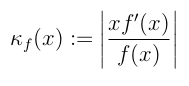
* kj(x) := |xf'(x)/f(x)|

e fornece uma estimativa de quanto os erros relativos na entrada |∆y/y|
serão amplificados na saída |∆x/x| 

De modo geral, quando f depende de várias variáveis, podemos obter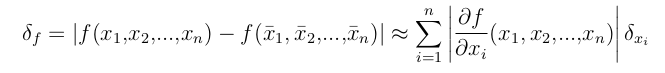

### Cancelamento Catastrófico

* Quando fazemos subtrações com números muito próximos entre si ocorre o
cancelamento catastrófico, onde podemos perder vários dígitos de precisão em uma
única subtração.